# Network Science - MDS - UDD 2022
## Tarea 2 Ciencia de Redes


#### Patricio Ramirez
#### Pablo Elgueta




### Redes? Grafos?

Una estructura matemática utilizada para modelar relaciones por pares entre objetos, donde los objetos generalmente se denominan `nodos` y la relación entre ellos `enlaces`.

$G = (V, E)$

$V$ = conjunto de nodos/vértices

$E$ = conjunto de $(x, y)$ enlaces

In [1]:
# Module 1: Comenzando con NetworkX

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import collections

import networkx as nx

%matplotlib inline

import urllib.request as urllib
import io

# path = 'https://saref.github.io/teaching/PyNetworkshop/'

## Trabajemos en una red real

La red de colaboración Arxiv GR-QC (Relatividad General y Cosmología Cuántica) es de e-print arXiv y cubre las colaboraciones científicas entre los artículos de los autores enviados a la categoría de Relatividad General y Cosmología Cuántica. Si un autor $i$ es coautor de un artículo con el autor $j$, el grafo contiene un enlace no dirigido entre $i$ y $j$. Si el artículo es co-autoreado por $k$ autores, esto genera un (sub) grafo completamente conectado con $k$ nodos.

fuente: http://snap.stanford.edu/data/index.html#canets

In [2]:
# crear un grafo de autor a partir del conjunto de datos
import csv
authors_graph = nx.Graph()

with open('data/CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [3]:
type(authors_graph)

networkx.classes.graph.Graph

In [4]:
print(authors_graph.number_of_edges())
print(authors_graph.number_of_nodes())

14496
5242


In [5]:
#authors_graph.nodes()

In [6]:
(authors_graph['3466'])

AtlasView({'937': {}, '5233': {}, '8579': {}, '10310': {}, '15931': {}, '17038': {}, '18720': {}, '19607': {}})

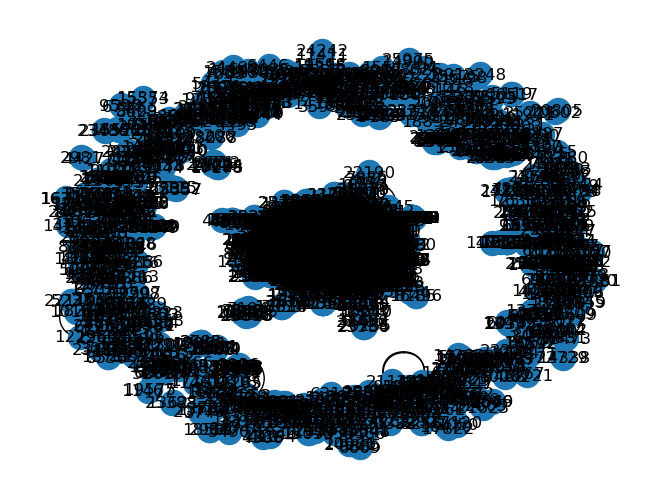

In [7]:
nx.draw(authors_graph,with_labels=True)

#### ¿Podemos encontrar al investigador más influyente/importante en esta red?

##### ¿Cómo evaluamos la importancia de algunas personas en una red?

Dentro de una red social, habrá determinadas personas que desempeñen determinadas funciones importantes. Por ejemplo, puede haber personas hiperconectadas que estén conectadas con muchas, muchas más personas. Ellas serán claves para la difusión de información. Alternativamente, si se tratara de una red de contactos de enfermedades, identificarlos sería útil para detener la propagación de enfermedades. 

#### ¿Cómo se identificaría a estas personas?

### Ejercicio 1

Cree una lista de tuplas (nodo, grado de nodo) y busque el nodo con el grado máximo.

grado de nodo = número de vecinos

In [8]:
#authors_graph.degree()

In [9]:
degrees = list(dict(authors_graph.degree()).values())
pd.DataFrame(degrees).transpose()

,0,1,2,3,4,5,6,7,8,9,...,5232,5233,5234,5235,5236,5237,5238,5239,5240,5241
0,8,5,2,5,13,10,17,3,4,8,...,1,1,1,1,1,1,1,2,2,2


In [10]:
kmax = max(degrees)
kmax

81

In [11]:
print(f"El nodo que contiene el grado maximo {kmax} es el", list(dict(authors_graph.degree()).keys())[list(dict(authors_graph.degree()).values()).index(kmax)])

El nodo que contiene el grado maximo 81 es el 21012


El grado de un nodo se traduce en grado de centralidad (que es una versión normalizada de grado)

In [12]:
nx.degree_centrality(authors_graph)

{'3466': 0.0015264262545315779,
 '937': 0.0009540164090822362,
 '5233': 0.00038160656363289447,
 '8579': 0.0009540164090822362,
 '10310': 0.002480442663613814,
 '15931': 0.0019080328181644724,
 '17038': 0.003243655790879603,
 '18720': 0.0005724098454493417,
 '19607': 0.0007632131272657889,
 '1854': 0.0015264262545315779,
 '4583': 0.0005724098454493417,
 '9572': 0.006487311581759206,
 '10841': 0.0013356229727151307,
 '13056': 0.0019080328181644724,
 '14982': 0.00038160656363289447,
 '16310': 0.003243655790879603,
 '19640': 0.004770082045411181,
 '23855': 0.0015264262545315779,
 '24372': 0.00019080328181644724,
 '24814': 0.0040068689181453915,
 '5052': 0.00553329517267697,
 '899': 0.0005724098454493417,
 '1796': 0.00038160656363289447,
 '2287': 0.0026712459454302615,
 '3096': 0.0022896393817973667,
 '3386': 0.0020988360999809196,
 '4472': 0.0007632131272657889,
 '5346': 0.003816065636328945,
 '5740': 0.00019080328181644724,
 '6094': 0.0007632131272657889,
 '6376': 0.00038160656363289447,

In [13]:
print(f"El nodo que contiene el grado de centralidad maximo {max(nx.degree_centrality(authors_graph).values())} es el", list(dict(nx.degree_centrality(authors_graph)).keys())[list(dict(nx.degree_centrality(authors_graph)).values()).index(max(nx.degree_centrality(authors_graph).values()))])

El nodo que contiene el grado de centralidad maximo 0.015455065827132226 es el 21012


###### Respuesta 1: 

El grado de centralidad para el nodo **21012**, nos permite identificar que pese a ser el **nodo con mayor grado** dentro de la red, en realidad solo presenta enlaces con un **1,5%** de los nodos totales de la red, lo cual nos dice que en una red grande hay una mayor distribucion en los grados de enlaces.

### Ejercicio 2

Trace un histograma de centralidad de grado de author_graph.

Sugerencia: `plt.hist(list_of_values)` trazará un histograma

(count vs grado)

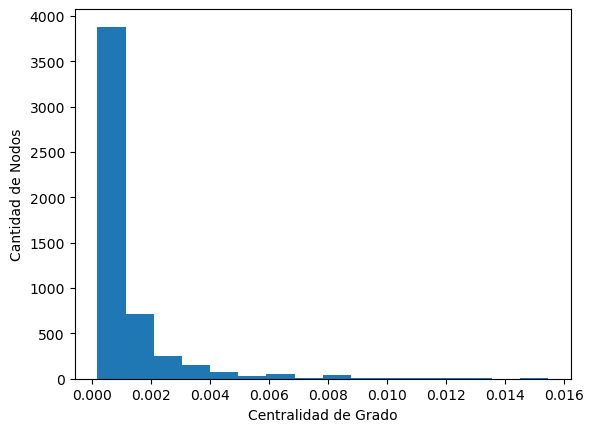

In [14]:
plt.hist(list(dict(nx.degree_centrality(authors_graph)).values()), bins=16)
plt.xlabel('Centralidad de Grado')
plt.ylabel('Cantidad de Nodos') 
plt.show()

###### Respuesta 2: 
En primer lugar, es posible apreciar que la mayoría de los nodos presentan una baja Centralidades de Grado inferior a 0,001. 

De acuerdo al gráfico es posible concluir que tenemos una red de **libre escala**.


#### Echemos un vistazo a los componentes conectados de un grafo.

En la teoría de grafos, un componente conectado (o simplemente un componente) de un grafo **no dirigido** es un subgrafo en el que dos vértices cualesquiera están conectados entre sí por caminos, y que no está conectado a ningún vértice adicional en el supergrafo.

In [15]:
print([len(c) for c in sorted(nx.connected_components(authors_graph),
                              key=len, reverse=True)])


[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

Nota: la función sorted () tiene un parámetro opcional llamado `key` que toma una función como su valor. Esta función `key` transforma cada elemento antes de ordenar, toma el valor y se usa dentro de `sorted` en lugar del valor original.

In [16]:
# Guardamos subgrafos en una lista
graphs = [authors_graph.subgraph(c).copy() for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)]


# MUNDO PEQUEÑO
### Ejercicio 3
##### Seis grados de separación, número de Erdos, número de Bacon !!



Encuentre el "número" del autor '22504' del grafo `author_graph`, si no hay conexión entre los nodos, asignele el número '-1'.
También trace un histograma del "número" autor '22504'.

Encuentre la longitud de ruta más corta promedio en el primer componente, es decir, `graphs[0]`

SUGERENCIA: `nx.shortest_path_length`

In [17]:
d = {}
for node in authors_graph.nodes():#para cada nodo
    try:
        #calcula la longitud del camino mas corto entre node y `22504`
        d[node] = nx.shortest_path_length(authors_graph, '22504', node) #21012;22504
    except:
        #si arroja error (no hay camino) asinga un -1.
        d[node] = int(-1) #21012;22504
        next

In [18]:
d

{'3466': 6,
 '937': 6,
 '5233': 6,
 '8579': 6,
 '10310': 5,
 '15931': 5,
 '17038': 6,
 '18720': 6,
 '19607': 6,
 '1854': 5,
 '4583': 6,
 '9572': 5,
 '10841': 5,
 '13056': 4,
 '14982': 5,
 '16310': 4,
 '19640': 5,
 '23855': 5,
 '24372': 6,
 '24814': 5,
 '5052': 3,
 '899': 4,
 '1796': 4,
 '2287': 4,
 '3096': 3,
 '3386': 4,
 '4472': 4,
 '5346': 4,
 '5740': 4,
 '6094': 4,
 '6376': 4,
 '9124': 4,
 '10235': 4,
 '10427': 4,
 '10597': 4,
 '15159': 4,
 '16148': 3,
 '16741': 4,
 '18235': 4,
 '18549': 4,
 '19297': 4,
 '20511': 4,
 '20595': 4,
 '20613': 4,
 '24371': 2,
 '24559': 4,
 '24731': 4,
 '25102': 4,
 '25271': 4,
 '25396': 4,
 '1658': 5,
 '4822': 5,
 '6864': 5,
 '7689': 4,
 '7926': 5,
 '10268': 5,
 '12971': 5,
 '18600': 5,
 '20421': 5,
 '20886': 5,
 '21048': 5,
 '22393': 5,
 '23186': 5,
 '23214': 5,
 '23298': 5,
 '23945': 5,
 '24939': 5,
 '339': 4,
 '624': 5,
 '3731': 5,
 '4743': 5,
 '5407': 5,
 '6610': 5,
 '6700': 5,
 '8045': 6,
 '9099': 5,
 '9639': 6,
 '9785': 5,
 '12141': 6,
 '15184': 5,

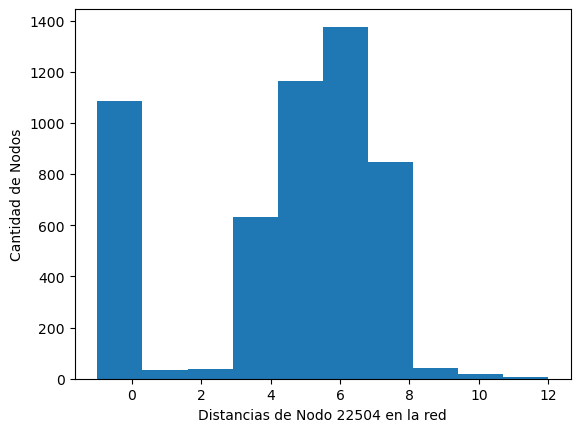

In [19]:
plt.hist(list(d.values()))
plt.xlabel('Distancias de Nodo 22504 en la red')
plt.ylabel('Cantidad de Nodos')
plt.show()

###### Respuesta 3.1.

En este gráfico es posible apreciar que una cantidad significativa de nodos no presentan conexión con el nodo 22504, lo cual se puede atribuir al hecho de que aquellos nodos que no presentan conexión con el nodo 22504 puden ser nodos aislados o pertenecientes a otra componente, por lo cual no presentan ninguna conexión con la Primera Componenete Graph[0].

In [20]:
d = {}
for node in graphs[0].nodes():#para cada nodo
    try:
        #calcula la longitud del camino mas corto entre node y `22504`
        d[node] = nx.shortest_path_length(graphs[0], '22504', node) #21012;22504
    except:
        #si arroja error (no hay camino) asinga un -1.
        d[node] = int(-1) #21012;22504
        next

In [21]:
d

{'3466': 6,
 '937': 6,
 '5233': 6,
 '8579': 6,
 '10310': 5,
 '15931': 5,
 '17038': 6,
 '18720': 6,
 '19607': 6,
 '1854': 5,
 '4583': 6,
 '9572': 5,
 '10841': 5,
 '13056': 4,
 '14982': 5,
 '16310': 4,
 '19640': 5,
 '23855': 5,
 '24372': 6,
 '24814': 5,
 '5052': 3,
 '899': 4,
 '1796': 4,
 '2287': 4,
 '3096': 3,
 '3386': 4,
 '4472': 4,
 '5346': 4,
 '5740': 4,
 '6094': 4,
 '6376': 4,
 '9124': 4,
 '10235': 4,
 '10427': 4,
 '10597': 4,
 '15159': 4,
 '16148': 3,
 '16741': 4,
 '18235': 4,
 '18549': 4,
 '19297': 4,
 '20511': 4,
 '20595': 4,
 '20613': 4,
 '24371': 2,
 '24559': 4,
 '24731': 4,
 '25102': 4,
 '25271': 4,
 '25396': 4,
 '1658': 5,
 '4822': 5,
 '6864': 5,
 '7689': 4,
 '7926': 5,
 '10268': 5,
 '12971': 5,
 '18600': 5,
 '20421': 5,
 '20886': 5,
 '21048': 5,
 '22393': 5,
 '23186': 5,
 '23214': 5,
 '23298': 5,
 '23945': 5,
 '24939': 5,
 '339': 4,
 '624': 5,
 '3731': 5,
 '4743': 5,
 '5407': 5,
 '6610': 5,
 '6700': 5,
 '8045': 6,
 '9099': 5,
 '9639': 6,
 '9785': 5,
 '12141': 6,
 '15184': 5,

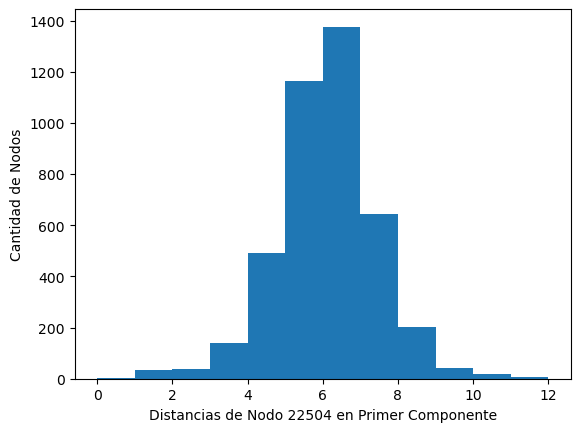

In [22]:
plt.hist(list(d.values()), bins=12)
plt.xlabel('Distancias de Nodo 22504 en Primer Componente')
plt.ylabel('Cantidad de Nodos')
plt.show()

In [23]:
# Calcule el promedio de la longitud de los caminos más cortos de todo el grafo aca:

np.mean(list(d.values()))

5.61014911014911

###### Respuesta 3.2.

En este caso, acotando el análisis solo a la Prmera Componente Graph[o] se aprecia que el nodoposee una distancia de entre 1 a 12 con el resto de nodos de la Componente y que la mayoría se encuentran entre 4 y 8, lo que permite apreciar una distribución normal en las distancias para el nodo 22504, lo cual se confirma en que la longitud más corta promedio es 5,6 un valor muy cercano a la mitad del rango de distancias para dicho nodo, lo cual también se coincide con lo visto en clases para "Mundo Pequeño".